In [1]:
# for loading/processing the images  
import tensorflow as tf

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.resnet_v2 import preprocess_input 

# models 
from tensorflow.keras.applications import VGG16,VGG19,ResNet101V2
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import randint
import pandas as pd
import pickle
# for metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score,homogeneity_score,silhouette_score


In [ ]:
model = ResNet101V2(include_top=True,weights='imagenet',input_shape=(224,224,3),pooling='max')

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()       

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from numpy.ma.mrecords import fromrecords
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/newest_data.zip" -d '/content/dataset'

Archive:  /content/drive/My Drive/newest_data.zip
   creating: /content/dataset/daata/
   creating: /content/dataset/daata/caricature/
  inflating: /content/dataset/daata/caricature/001.jpg  
  inflating: /content/dataset/daata/caricature/002.jpg  
  inflating: /content/dataset/daata/caricature/003.jpg  
  inflating: /content/dataset/daata/caricature/004.jpg  
  inflating: /content/dataset/daata/caricature/005.jpg  
  inflating: /content/dataset/daata/caricature/006.jpg  
  inflating: /content/dataset/daata/caricature/007.jpg  
  inflating: /content/dataset/daata/caricature/008.jpg  
  inflating: /content/dataset/daata/caricature/009.jpg  
  inflating: /content/dataset/daata/caricature/010.jpg  
  inflating: /content/dataset/daata/caricature/011.jpg  
  inflating: /content/dataset/daata/caricature/012.jpg  
  inflating: /content/dataset/daata/caricature/013.jpg  
  inflating: /content/dataset/daata/caricature/014.jpg  
  inflating: /content/dataset/daata/caricature/015.jpg  
  inflatin

In [ ]:
manif_dir = '/content/dataset/daata/manifestation/'
text_dir = '/content/dataset/daata/texte/'
carric_dir = '/content/dataset/daata/caricature/'
famille_dir = '/content/dataset/daata/famille/'

In [ ]:
manif_files = text_files = carac_files = famille_files = []



In [ ]:
manif_files = sorted(os.listdir(manif_dir))

In [ ]:
manif_files[:5]

['0.jpg', '001.jpg', '002.jpg', '003.jpg', '004.jpg']

In [ ]:
text_files = sorted(os.listdir(text_dir))

In [ ]:
text_files[:5]

['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg']

In [ ]:
carac_files = sorted(os.listdir(carric_dir))

In [ ]:
carac_files[:5]

['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg']

In [ ]:
famille_files  = sorted(os.listdir(famille_dir))

In [ ]:
def get_features(file, model):
    # get l'image  224x224 
    img = load_img(file, target_size=(224,224))
    # convertir l'image en numpy
    img = np.array(img) 
    # batch_size = 1, taille = 224x224 , channel = 3
    reshaped_img = img.reshape(1,224,224,3) 
    # passage vers le modele
    imgx = preprocess_input(reshaped_img)
    # get le vecteur de feature
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
def features(class_files,class_number): 
  data = {}
  list_class = [manif_dir, text_dir, famille_dir,carric_dir]
  for img in class_files: 
    try : 
      feat = get_features(list_class[class_number]+img,model)
      data[img] = feat
    except : 
      print(str(class_number)+' '+img)
    

  return data

In [ ]:
manif_features = features(manif_files,0)
texte_features = features(text_files,1)
caricature_features = features(carac_files,3)
famille_features = features(famille_files,2)

0 973.jpg


In [ ]:
np.save('feature_manif_array',np.array(list(manif_features.values())))
np.save('feature_texte_array',np.array(list(texte_features.values())))
np.save('feature_famille_array',np.array(list(famille_features.values())))
np.save('feature_caricature_array',np.array(list(caricature_features.values())))

In [ ]:
manif= np.load('feature_manif_array.npy')
famille = np.load('feature_famille_array.npy')
texte = np.load('feature_texte_array.npy')
caricature = np.load('feature_caricature_array.npy')

In [ ]:
manif = np.array(list(manif_features.values()))
famille = np.array(list(famille_features.values()))
texte = np.array(list(texte_features.values()))
caricature = np.array(list(caricature_features.values()))

In [ ]:
manif = manif.reshape(-1,2048)
famille = famille.reshape(-1,2048)
texte = texte.reshape(-1,2048)
caricature = caricature.reshape(-1,2048)

In [3]:
manif= np.load('feature_manif_array.npy')
manif = manif.reshape(-1,2048)
pca = PCA(n_components=150, random_state=42)
pca.fit(manif)
manif = pca.transform(manif)

In [ ]:
pca = PCA(n_components=150, random_state=42)
pca.fit(manif)
manif = pca.transform(manif)
pca.fit(famille)
famille = pca.transform(famille)
pca.fit(texte)
texte = pca.transform(texte)
pca.fit(caricature)
caricature = pca.transform(caricature)


In [4]:
manif.shape

(999, 150)

In [34]:
np.min(manif)

-19.558567

In [35]:
np.max(manif)

27.59233

In [ ]:
manif_df = pd.DataFrame(manif)
famille_df = pd.DataFrame(famille)
texte_df = pd.DataFrame(texte)
caricature_df = pd.DataFrame(caricature)

In [31]:
x = np.argmax(np.max(np.histogram(manif,bins=15)))
x

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

In [32]:
np.histogram(manif,bins=15)

(array([   15,    86,   253,   984,  4408, 42485, 88461, 10661,  1675,
          478,   206,    93,    31,    12,     2]),
 array([-19.558567  , -16.415174  , -13.271781  , -10.128387  ,
         -6.9849944 ,  -3.8416011 ,  -0.69820786,   2.4451854 ,
          5.5885787 ,   8.731972  ,  11.875365  ,  15.018758  ,
         18.162151  ,  21.305544  ,  24.448938  ,  27.59233   ],
       dtype=float32))

In [25]:
manif_138 = manif[:,148]
manif_138.shape

(999,)

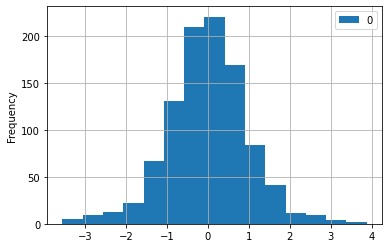

In [26]:
manif_138_df = pd.DataFrame(manif_138)
ax = manif_138_df.plot.hist(bins=15,grid=True)


In [23]:
manif_149 = manif[:,149]
manif_149.shape

(999,)

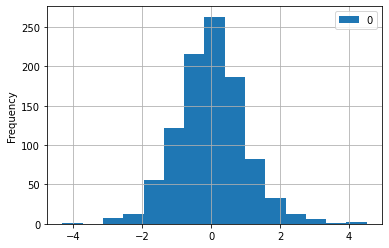

In [24]:
manif_149_df = pd.DataFrame(manif_149)
for i in range(150): 
  ax = manif_149_df.plot.hist(bins=15,grid=True)


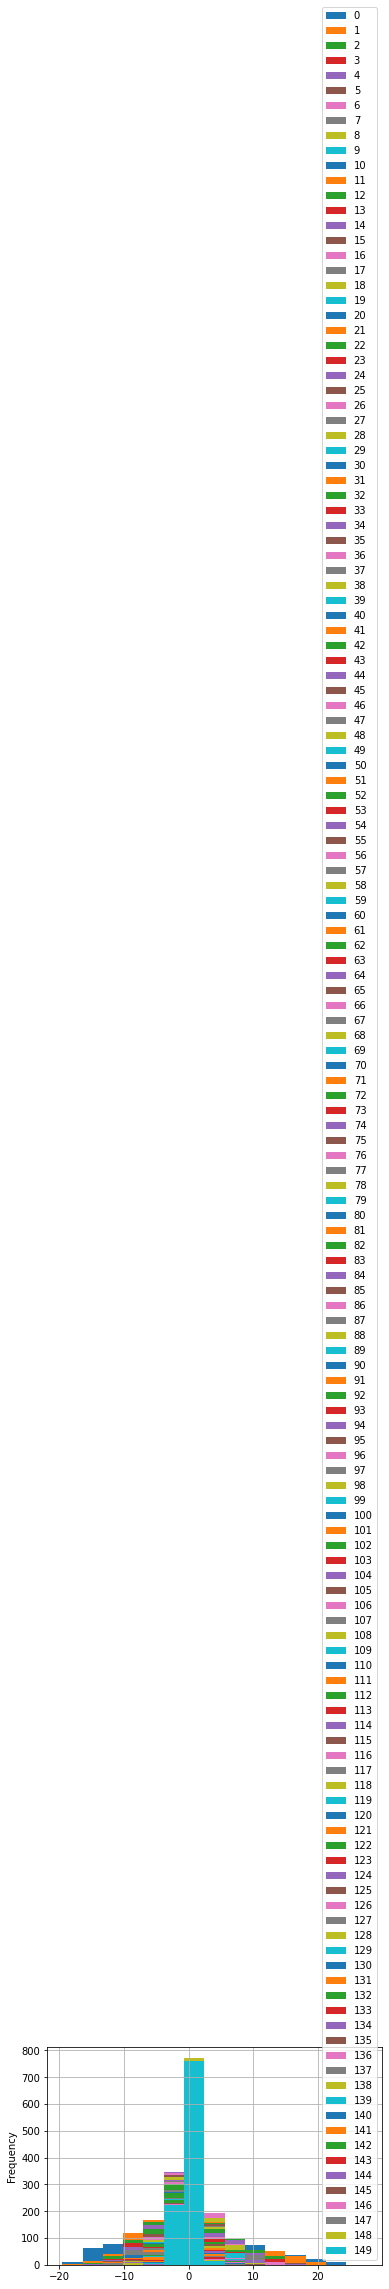

In [6]:
manif_df = pd.DataFrame(manif)

ax = manif_df.plot.hist(bins=15,grid=True)


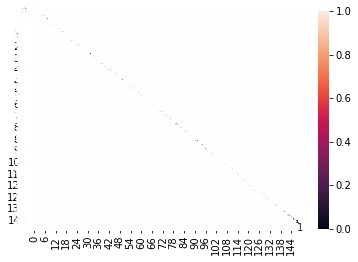

In [ ]:
sns.heatmap(manif_df.corr(),annot=True)
plt.show()


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


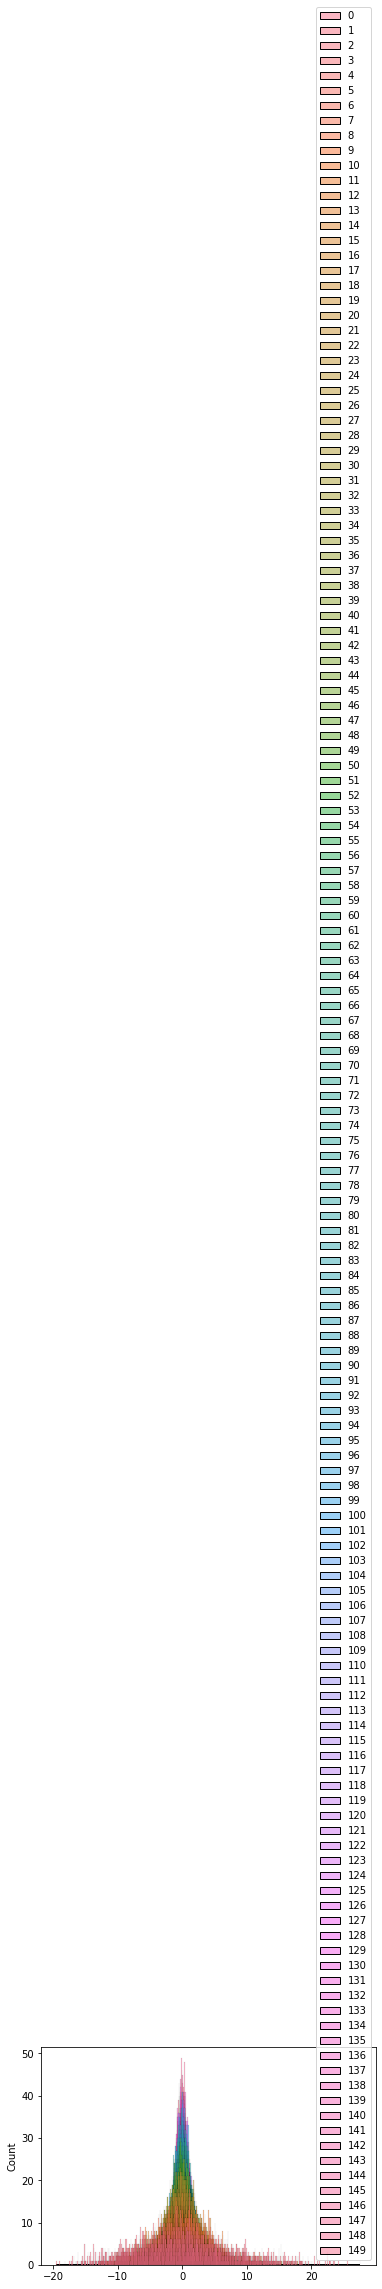

In [7]:
import seaborn as sns 
sns.histplot(manif_df)

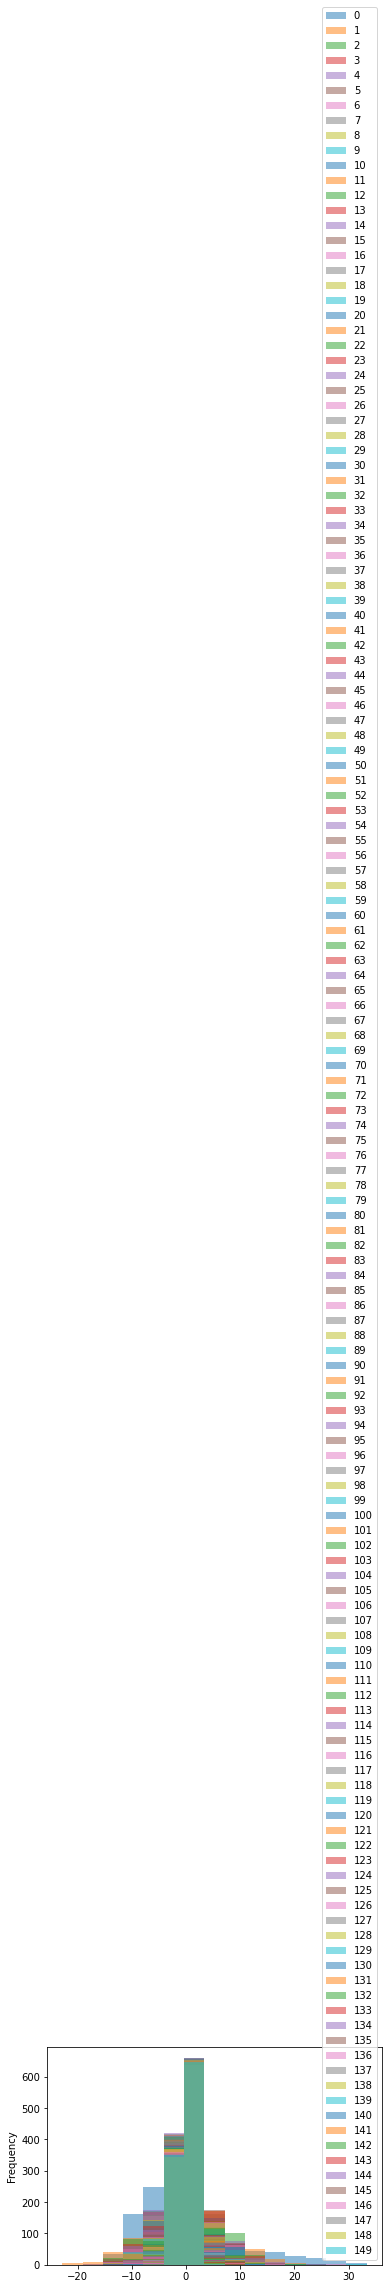

In [ ]:
ax = famille_df.plot.hist(bins=15, alpha=0.5)


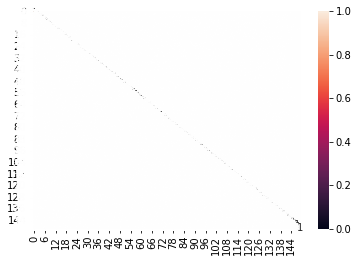

In [ ]:
sns.heatmap(famille_df.corr(),annot=True)
plt.show()

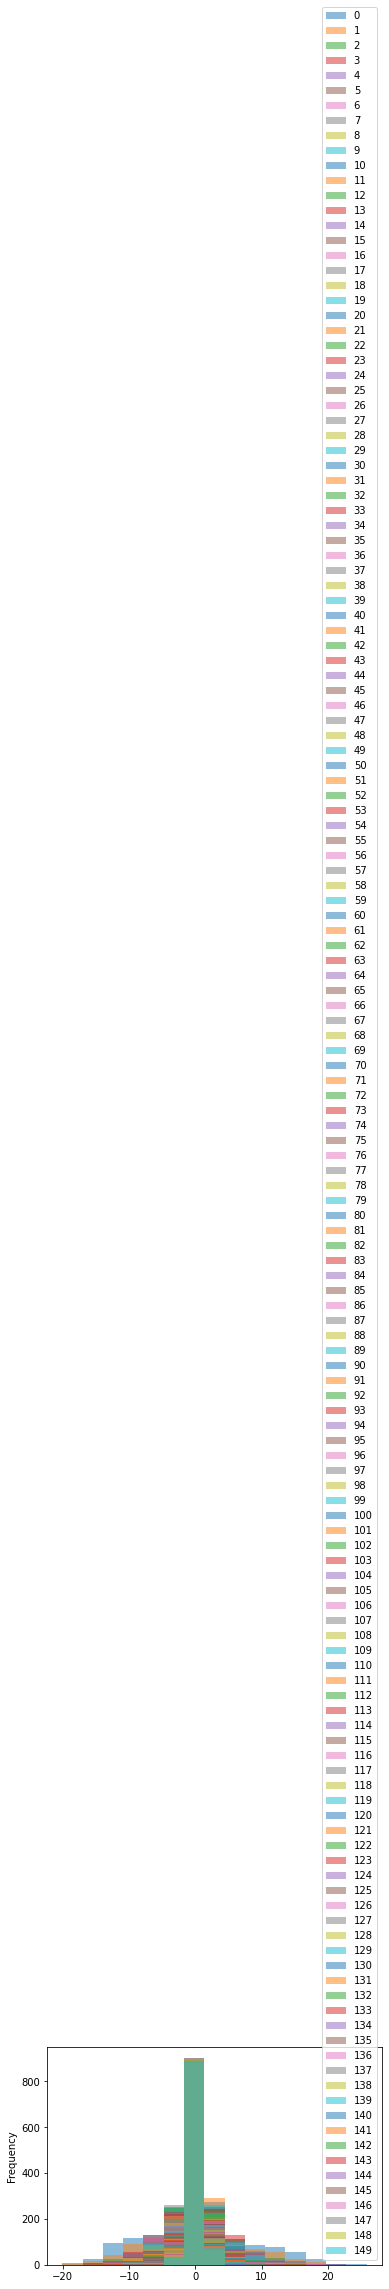

In [ ]:
ax = caricature_df.plot.hist(bins=15, alpha=0.5)


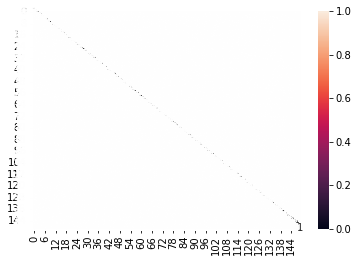

In [ ]:
sns.heatmap(caricature_df.corr(),annot=True)
plt.show()

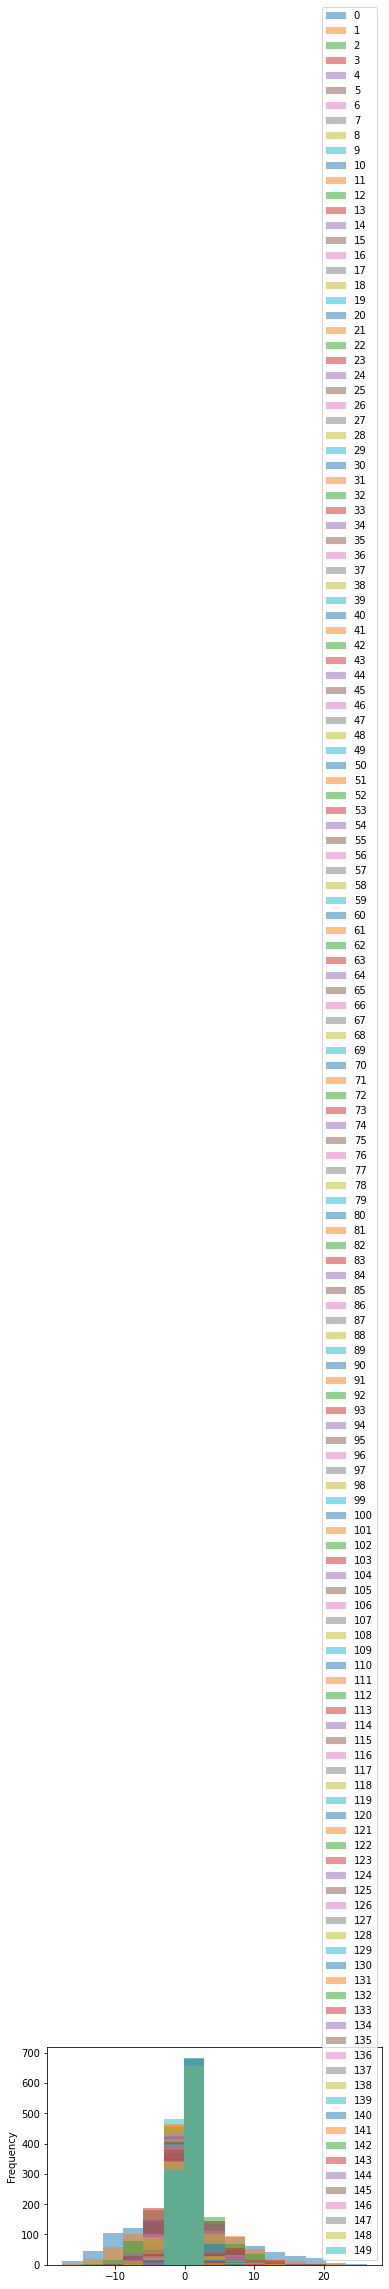

In [ ]:
ax = texte_df.plot.hist(bins=15, alpha=0.5)


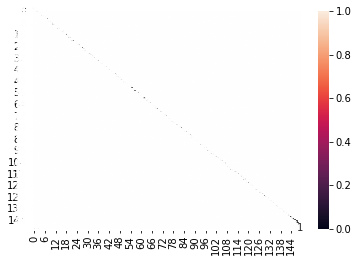

In [ ]:
sns.heatmap(texte_df.corr(),annot=True)
plt.show()